In [35]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import constants as const

In [36]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [37]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

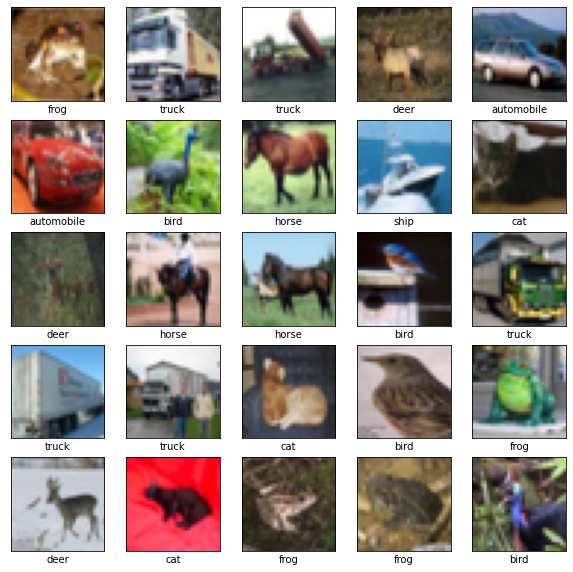

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [39]:
model = keras.Sequential()
model.add(layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.LeakyReLU())
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.LeakyReLU())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10))

In [40]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=3e-4),
    metrics=["accuracy"],
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 32)       

In [41]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=2,validation_data=(x_test,y_test))
predictions = model.predict(x=x_test, batch_size=64, verbose=0)
rounded_predictions = np.argmax(predictions, axis=1)

Epoch 1/20
782/782 - 14s - loss: 1.8437 - accuracy: 0.3343 - val_loss: 1.9874 - val_accuracy: 0.2605
Epoch 2/20
782/782 - 11s - loss: 1.4868 - accuracy: 0.4591 - val_loss: 2.2635 - val_accuracy: 0.2395
Epoch 3/20
782/782 - 11s - loss: 1.3200 - accuracy: 0.5249 - val_loss: 1.7455 - val_accuracy: 0.3756
Epoch 4/20
782/782 - 11s - loss: 1.2001 - accuracy: 0.5754 - val_loss: 1.4957 - val_accuracy: 0.4690
Epoch 5/20
782/782 - 12s - loss: 1.1033 - accuracy: 0.6103 - val_loss: 1.3253 - val_accuracy: 0.5282
Epoch 6/20
782/782 - 12s - loss: 1.0288 - accuracy: 0.6371 - val_loss: 1.4580 - val_accuracy: 0.4867
Epoch 7/20
782/782 - 12s - loss: 0.9579 - accuracy: 0.6635 - val_loss: 1.4046 - val_accuracy: 0.5183
Epoch 8/20
782/782 - 11s - loss: 0.9001 - accuracy: 0.6869 - val_loss: 1.4405 - val_accuracy: 0.5227
Epoch 9/20
782/782 - 12s - loss: 0.8531 - accuracy: 0.7037 - val_loss: 1.3047 - val_accuracy: 0.5569
Epoch 10/20
782/782 - 11s - loss: 0.8044 - accuracy: 0.7227 - val_loss: 1.1341 - val_accura

313/313 - 2s - loss: 0.7280 - accuracy: 0.7517


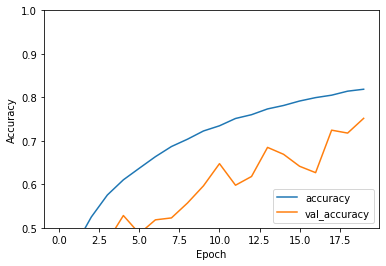

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

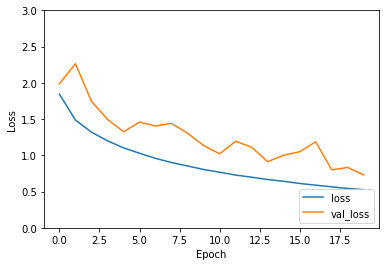

In [43]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])

plt.legend(loc='lower right')

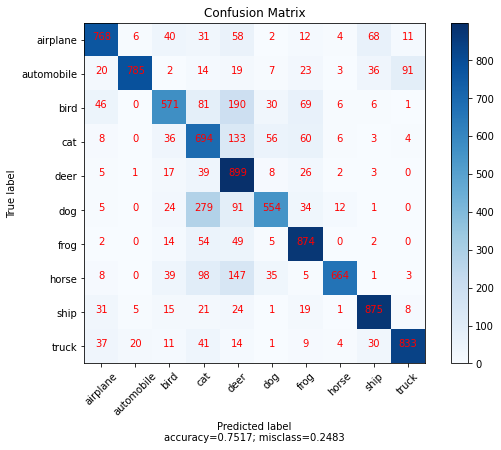

In [44]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    # import matplotlib.pyplot as plt
    # import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thtest_labelsresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


plot_confusion_matrix(cm=cm, target_names=class_names, title="Confusion Matrix", normalize=False)